In [9]:
import iris
import glob
import iris.coord_categorisation
import numpy as np
import matplotlib.pyplot as plt

In [4]:
directories = glob.glob('/data/BatCaveNAS/ph290/CMIP6_william/tos_day_ssp???_r1i1p1f1_r1i1p1f2/processed_native_grid_global')

# for d in directories:
d = directories[0]
files = glob.glob(d+'/dhw_*GBR.nc')

# for f in files:
f = files[0]


/home/ph290/anaconda2/envs/mypython3/lib/python3.8/site-packages/iris/fileformats/cf.py:803: UserWarning: Missing CF-netCDF measure variable 'areacello', referenced by netCDF variable 'tos'
  warnings.warn(message % (variable_name, nc_var_name))


In [5]:
cube = iris.load_cube(f)


try:
    iris.coord_categorisation.add_year(cube, 'time', name='year')
except:
    pass

try:
    iris.coord_categorisation.add_year(cube, 'time', name='year2')
except:
    pass

try:
    iris.coord_categorisation.add_month_number(cube, 'time', name='month_number')
except:
    pass

try:
    iris.coord_categorisation.add_day_of_month(cube, 'time', name='day_of_month')
except:
    pass

cube_years = cube.coord('year').points
cube_months = cube.coord('month_number').points
cube_days = cube.coord('day_of_month').points


/home/ph290/anaconda2/envs/mypython3/lib/python3.8/site-packages/iris/fileformats/cf.py:803: UserWarning: Missing CF-netCDF measure variable 'areacello', referenced by netCDF variable 'tos'
  warnings.warn(message % (variable_name, nc_var_name))


In [6]:
#change the year value from calendar years to the same 'year' used in William's relentless march paper (2019) (i.e. August 1-July 31) to encompass the complete austral summer.
#This is important so that one bleaching season (which crosses 1st Jan) does not get picked up as two bleaching years.
#Skirving 2019: 'for example, 1998 refers to (1) August 1, 1997–July 31, 1998 for the Southern Hemisphere'
coral_stress_year = np.zeros(len(cube_years))
coral_stress_year[:] = np.nan
tmp_year = np.min(cube_years)
for i in range(len(cube_years)):
    if (cube_months[i] == 8) & (cube_days[i] == 1):
        tmp_year += 1
    coral_stress_year[i] = tmp_year


cube.coord('year2').points = coral_stress_year.astype(int)

# note the [1:-1] is because the first and last year will have only aggregated half a year of data because of the above
dhw_austral_ann_max = cube.aggregated_by('year2', iris.analysis.MAX)[1:-1]

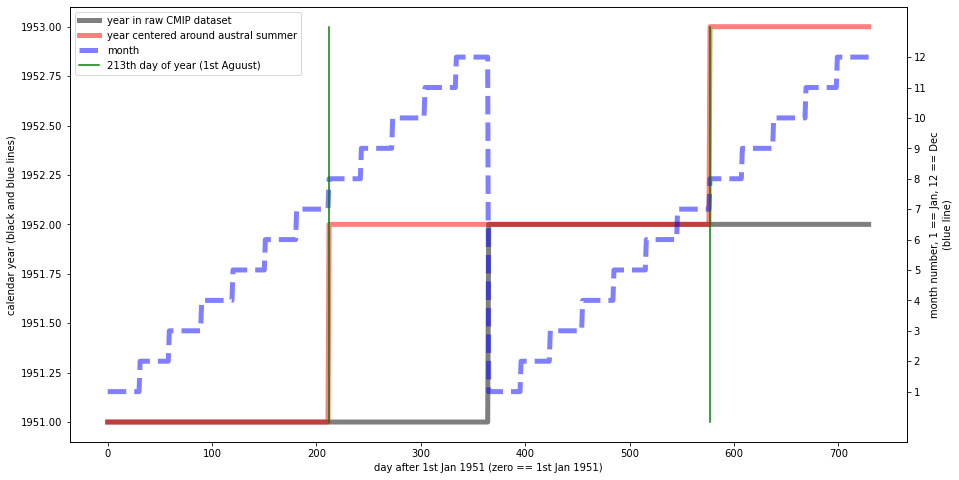

In [72]:
no_years = 2
fig, ax1 = plt.subplots(figsize=(15,8))
lns1 = ax1.plot(cube_years[0:365*no_years],'k',lw=5,alpha=0.5,label = 'year in raw CMIP dataset')
lns2 = ax1.plot(cube.coord('year2').points[0:365*no_years],'r',lw=5,alpha=0.5,label = 'year centered around austral summer')
ax2 = ax1.twinx()
lns3 = ax2.plot(cube_months[0:365*no_years],'b--',lw=5,alpha=0.5,label = 'month')
ax1.set_xlabel('day after 1st Jan 1951 (zero == 1st Jan 1951)')
ax1.set_ylabel('calendar year (black and blue lines)')
ax2.set_ylabel('month number, 1 == Jan, 12 == Dec\n(blue line)')
ax2.set_yticks(np.arange(12)+1)

lns4 = ax2.plot([212,212],[0,13],'g',label='213th day of year (1st Aguust)')
ax2.plot([212+365,212+365],[0,13],'g')


lns = lns1+lns2+lns3+lns4
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc=0)